<a href="https://colab.research.google.com/github/Mrkomiljon/google-colab-/blob/main/asosiy_churn_prediction_diploma_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
!ls

sample_data


In [ ]:
#loading data
df=pd.read_csv("https://raw.githubusercontent.com/Mrkomiljon/google-colab-/main/Telco_customer_churn.csv")
df.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
742,2002-MZHWP,1,United States,California,Delhi,95315,"37.422961, -120.765493",37.422961,-120.765493,Female,...,Month-to-month,No,Mailed check,20.50,20.5,Yes,1,76,3820,Lack of self-service on Website
3113,0274-JKUJR,1,United States,California,Los Angeles,90040,"33.994524, -118.149953",33.994524,-118.149953,Male,...,Month-to-month,No,Mailed check,58.85,465.7,No,0,76,3332,NaN
1618,0870-VEMYL,1,United States,California,Columbia,95310,"38.085839, -120.37855",38.085839,-120.378550,Female,...,Month-to-month,No,Credit card (automatic),53.85,259.8,Yes,1,74,5435,Competitor offered higher download speeds
1170,4806-KEXQR,1,United States,California,Lockeford,95237,"38.166791, -121.14207",38.166791,-121.142070,Male,...,Month-to-month,Yes,Electronic check,79.90,324.3,Yes,1,77,4669,Competitor had better devices
2058,0959-WHOKV,1,United States,California,Covina,91724,"34.08111, -117.853935",34.081110,-117.853935,Male,...,One year,Yes,Electronic check,99.00,4298.45,No,0,46,2887,NaN


In [ ]:
df.shape

(7032, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7032 non-null   int64  
 1   Country            7032 non-null   object 
 2   State              7032 non-null   object 
 3   City               7032 non-null   object 
 4   Zip Code           7032 non-null   int64  
 5   Lat Long           7032 non-null   object 
 6   Latitude           7032 non-null   float64
 7   Longitude          7032 non-null   float64
 8   Gender             7032 non-null   object 
 9   Senior Citizen     7032 non-null   object 
 10  Partner            7032 non-null   object 
 11  Dependents         7032 non-null   object 
 12  Tenure Months      7032 non-null   int64  
 13  Phone Service      7032 non-null   object 
 14  Multiple Lines     7032 non-null   object 
 15  Internet Service   7032 non-null   object 
 16  Online Security    7032 

In [ ]:
df.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [ ]:
df.rename(columns={'Total Charges':"Total_Charges"}, inplace=True)

In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total_Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

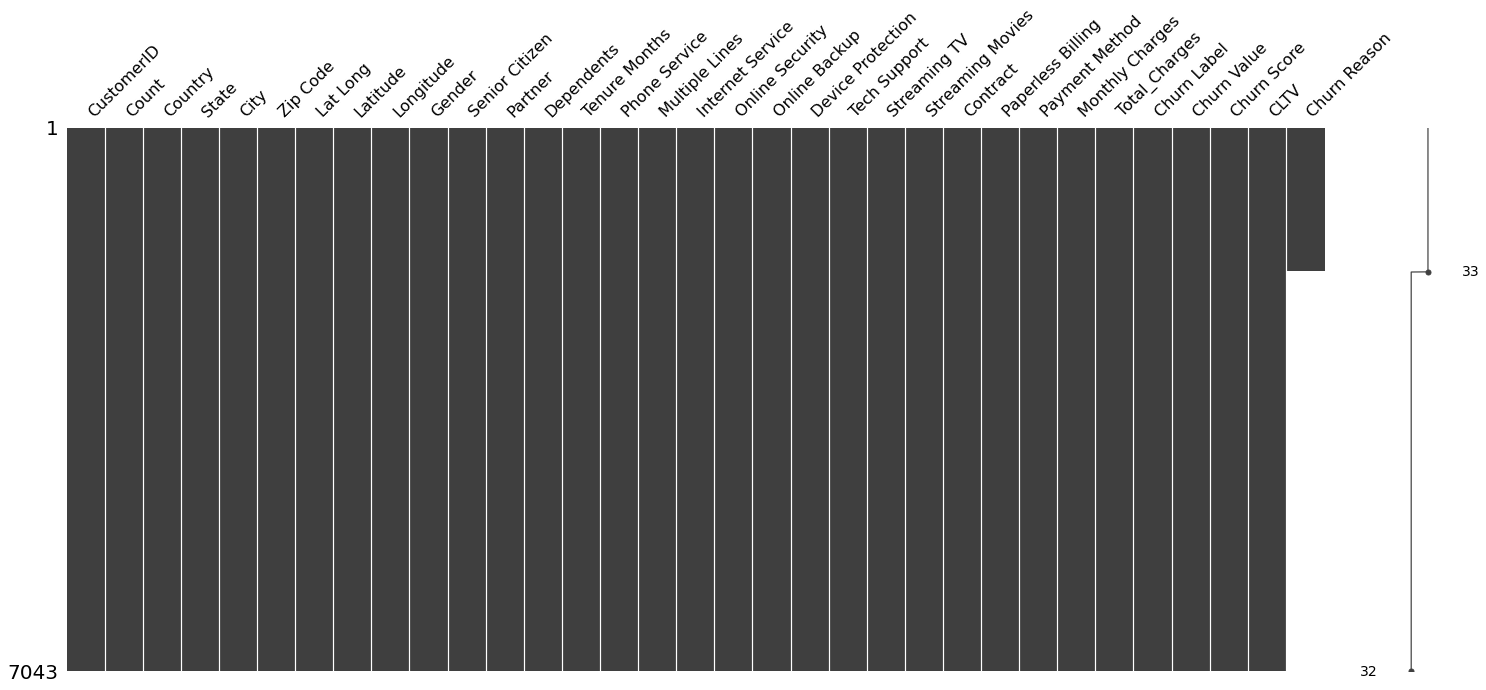

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

In [ ]:
# data manipulation

df = df.drop(['Churn Reason'], axis = 1)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [ ]:
df['CLTV'] = pd.to_numeric(df.CLTV, errors='coerce')
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total_Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [ ]:
df[np.isnan(df['CLTV'])]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Label,Churn Value,Churn Score,CLTV


bu joygacha ustunlar qatorida yetishmaydigan qiymatlarni uchirib, hamma ustunlarni tog'irlab oldim. endi yana malumotga ishlov berishda davom etamiz

In [ ]:
df["Internet Service"].describe(include=['object', 'bool'])

count            7043
unique              3
top       Fiber optic
freq             3096
Name: Internet Service, dtype: object

In [ ]:
#By looking at the above error, we can understand the reason behind the dtype('o')

len(df[df.Total_Charges==' ']) #We have 11 records with Total Charges value -> ' ' and all these rows have Churn value 'NO', let's remove these rows from our analysis (Having information on Churned customers is more important than info on unchurned records)  
df=df[df.Total_Charges!=' ']

df.Total_Charges=pd.to_numeric(df.Total_Charges)
np.dtype(df.Total_Charges)

dtype('float64')

In [ ]:
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total_Charges']
df[numerical_cols].describe()

,Tenure Months,Monthly Charges,Total_Charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Data Visualization

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn Value'].value_counts(), name="Churn Value"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

26.5 % of customers switched to another firm.

> 


Customers are 49.5 % female and 50.5 % male.

In [ ]:
df["Churn Label"][df["Churn Label"]=="No"].groupby(by=df["Gender"]).count()

Gender
Female    2544
Male      2619
Name: Churn Label, dtype: int64

In [ ]:
df["Churn Label"][df["Churn Label"]=="Yes"].groupby(by=df["Gender"]).count()

Gender
Female    939
Male      930
Name: Churn Label, dtype: int64

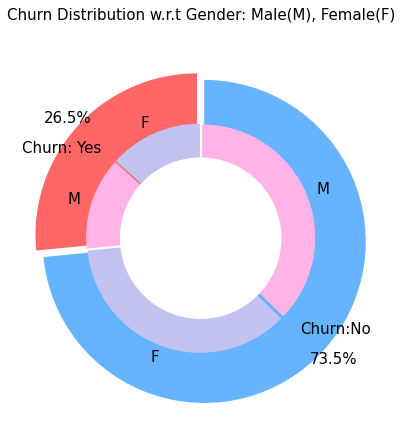

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5174]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2549,2625]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who changed the service provider.

Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.





In [ ]:
fig = px.histogram(df, x="Churn Label", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract(yani churnga uchraganlari yes qismidagilari)

In [ ]:
labels = df['Payment Method'].unique()
values = df['Payment Method'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn Label", color="Payment Method", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.

Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
df["Internet Service"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
 df[df["Gender"]=="Male"][["Internet Service", "Churn Label"]].value_counts()

Internet Service  Churn Label
DSL               No             992
Fiber optic       No             910
No                No             717
Fiber optic       Yes            633
DSL               Yes            240
No                Yes             57
dtype: int64

In [ ]:
df[df["Gender"]=="Female"][["Internet Service", "Churn Label"]].value_counts()

Internet Service  Churn Label
DSL               No             965
Fiber optic       No             889
No                No             690
Fiber optic       Yes            664
DSL               Yes            219
No                Yes             56
dtype: int64

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [969, 993, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [691, 722, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn Label", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn Label", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn Label", color="Senior Citizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn Label", color="Phone Service", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

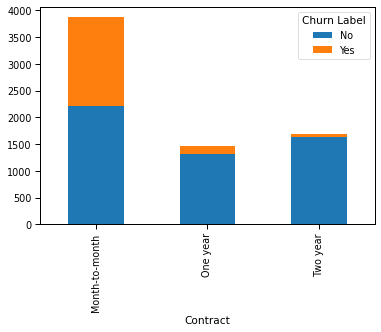

In [ ]:
df.groupby(['Contract','Churn Label']).size().unstack().plot(kind='bar',stacked=True); #Clearly, users with Month-to-Month contract are more likely to churn 

Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

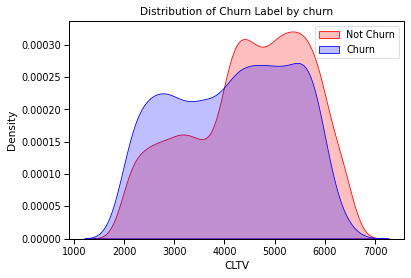

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.CLTV[(df["Churn Label"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.CLTV[(df["Churn Label"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('CLTV');
ax.set_title('Distribution of Churn Label by churn');

In [ ]:
"""ax = sns.kdeplot(df.Total Charges[(df["Churn Label "] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.Total Charges[(df["Chur Label"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
#ax.set_title('Distribution of total charges by churn');"""
# kodda xatolik bor yoki Total bn churn label bir biriga mos kelmayapti

'ax = sns.kdeplot(df.Total Charges[(df["Churn Label "] == \'No\') ],\n                color="Gold", shade = True);\nax = sns.kdeplot(df.Total Charges[(df["Chur Label"] == \'Yes\') ],\n                ax =ax, color="Green", shade= True);\nax.legend(["Not Chu0rn","Churn"],loc=\'upper right\');\nax.set_ylabel(\'Density\');\nax.set_xlabel(\'Total Charges\');\n#ax.set_title(\'Distribution of total charges by churn\');'

In [ ]:
fig = px.box(df, x='Churn Label', y = 'Tenure Months')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

demak yani klientlarda churn bo'lish ehtimoli yuqori ekan

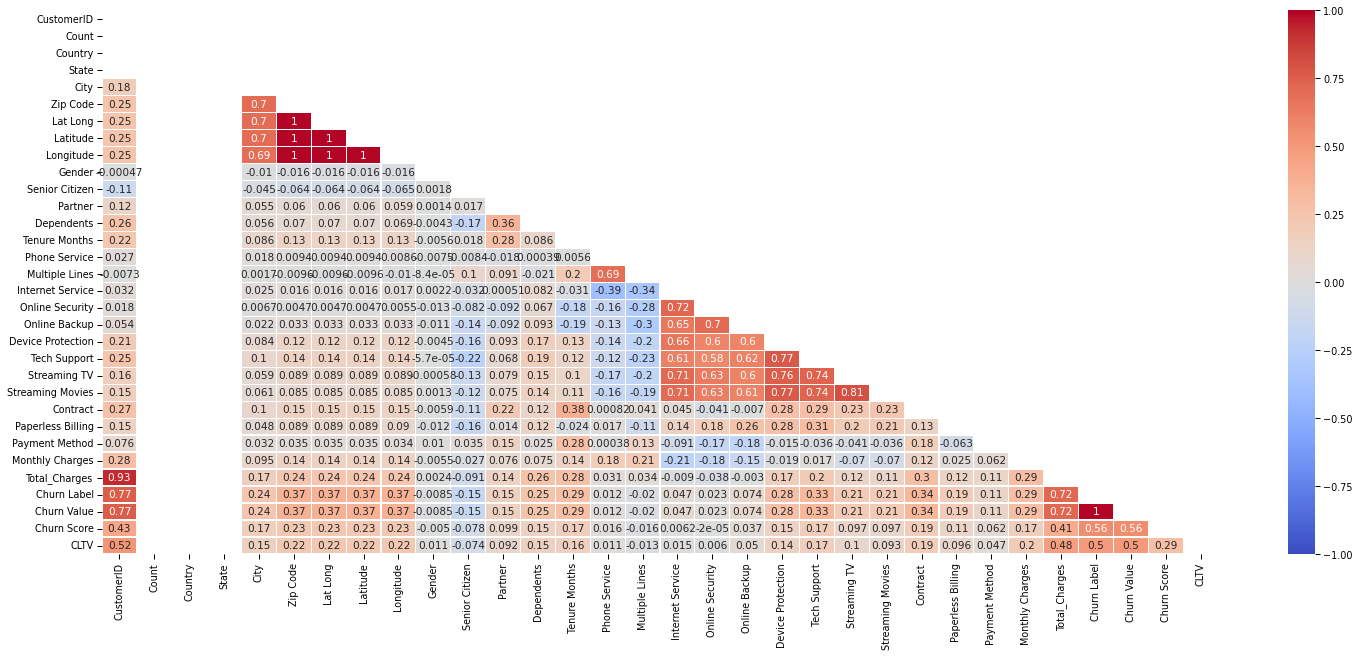

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

Data preproccessing

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Label,Churn Value,Churn Score,CLTV
0,0,0,0,562,2,327,33.964131,-118.272783,1,0,...,0,0,1,3,53.85,108.15,1,1,70,865
1,0,0,0,562,4,405,34.059281,-118.307420,0,0,...,0,0,1,2,70.70,151.65,1,1,51,484
2,0,0,0,562,5,393,34.048013,-118.293953,0,0,...,2,0,1,2,99.65,820.50,1,1,70,2584
3,0,0,0,562,8,410,34.062125,-118.315709,0,0,...,2,0,1,2,104.80,3046.05,1,1,68,2257
4,0,0,0,562,13,385,34.039224,-118.266293,1,0,...,2,0,1,0,103.70,5036.30,1,1,73,2553


In [ ]:
df.drop(columns="CustomerID", inplace=True)

In [ ]:
plt.figure(figsize=(21,14))
df.corr()['Churn Value'].sort_values(ascending = False)

Churn Label          1.000000
Churn Value          1.000000
Churn Score          0.665408
Monthly Charges      0.192858
Paperless Billing    0.191454
Senior Citizen       0.150541
Payment Method       0.107852
Multiple Lines       0.038043
Phone Service        0.011691
City                 0.008173
Longitude            0.004693
Zip Code             0.001246
Lat Long            -0.001177
Latitude            -0.003600
Gender              -0.008545
Streaming TV        -0.036303
Streaming Movies    -0.038802
Internet Service    -0.047097
CLTV                -0.126813
Partner             -0.149982
Device Protection   -0.177883
Online Backup       -0.195290
Total_Charges       -0.199484
Dependents          -0.248140
Tech Support        -0.282232
Online Security     -0.289050
Tenure Months       -0.354049
Contract            -0.396150
Count                     NaN
Country                   NaN
State                     NaN
Name: Churn Value, dtype: float64

<Figure size 1512x1008 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn Value'])
y = df['Churn Value'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

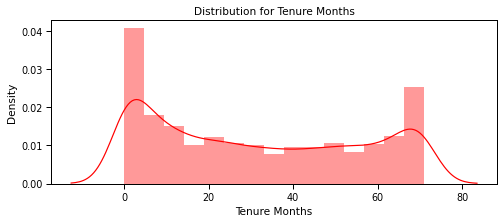

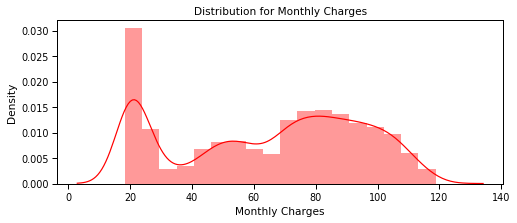

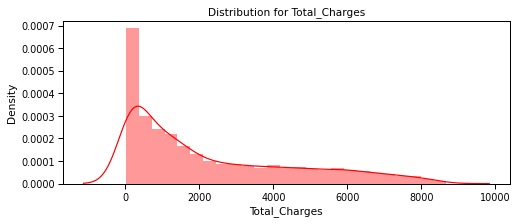

In [ ]:
num_cols = ['Tenure Months', 'Monthly Charges', 'Total_Charges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

standart

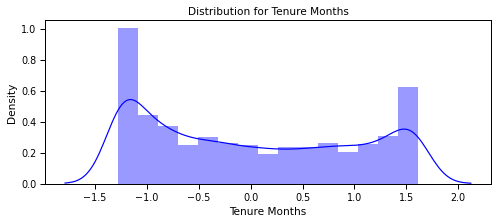

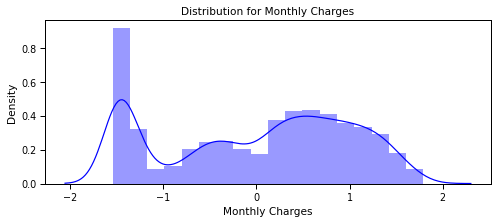

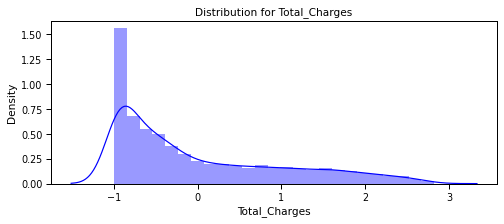

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='b')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['Payment Method', 'Contract', 'Internet Service'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total_Charges,Churn Label,Churn Score,CLTV
2907,0,0,0,948,1413,1312,38.606703,-120.586659,1,0,...,0,0,2,0,1,0.981556,1.659900,0,20,1916
7014,0,0,0,203,395,154,33.680031,-116.171678,1,0,...,0,0,0,0,2,-0.971546,-0.562252,0,49,509
4346,0,0,0,562,51,296,33.921280,-118.274186,0,0,...,0,0,2,0,1,0.837066,1.756104,0,39,1475
5186,0,0,0,395,1190,1119,37.902968,-119.667544,1,0,...,0,2,0,0,2,0.641092,-0.908326,0,27,2992
4485,0,0,0,977,237,485,34.139082,-118.392750,0,0,...,2,0,0,0,0,-0.808787,-0.101561,0,13,2757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,0,0,0,165,147,230,33.822295,-118.264110,1,1,...,0,0,1,1,0,0.197658,0.990321,0,14,2143
1345,0,0,0,644,167,545,34.211200,-118.230625,0,1,...,0,0,0,1,1,0.342148,-0.507338,1,83,1852
4917,0,0,0,1022,831,809,36.635661,-120.288644,0,0,...,2,2,2,1,1,0.926749,0.473507,0,61,1089
5005,0,0,0,30,945,1147,37.980057,-121.801599,0,0,...,0,2,1,1,3,0.029917,-0.721544,0,62,2513


Machine Learning Model Evaluations and **Predictions**

## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 50) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7341862117981521


In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



# SVM

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341862117981521


In [ ]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



Random Forest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = 4,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 50)
RF_model.fit(X_train, y_train)

# Make predictions
prediction_test = RF_model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

1.0


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



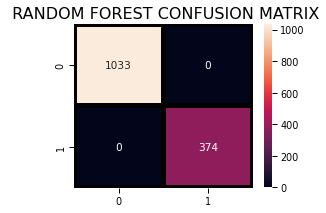

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=4)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=16)
plt.show()

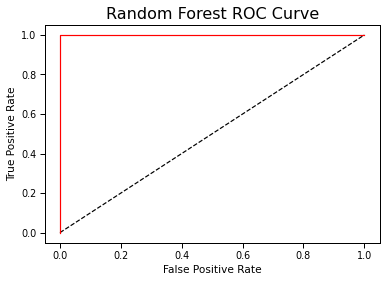

In [ ]:
y_rfpred_prob = RF_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
accuracy_LR = LR_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_LR)

Logistic Regression accuracy is : 0.9651741293532339


In [ ]:
LR_pred= LR_model.predict(X_test)
report = classification_report(y_test,LR_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1033
           1       0.93      0.94      0.93       374

    accuracy                           0.97      1407
   macro avg       0.95      0.96      0.96      1407
weighted avg       0.97      0.97      0.97      1407



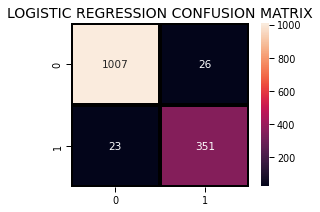

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, LR_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

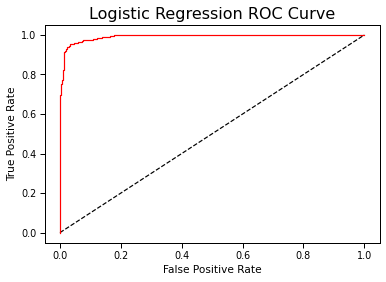

In [ ]:
y_pred_prob = LR_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(LR_model, filename)

['model.sav']

In [ ]:
model=joblib.load(filename)
model

LogisticRegression()

Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 1.0


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



AdaBoost Classifier

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, ada_preds)

AdaBoost Classifier accuracy


1.0

In [ ]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



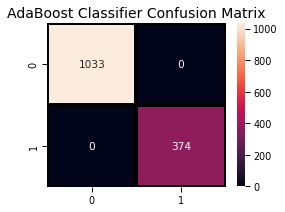

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, ada_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting Classifier

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 1.0


In [ ]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



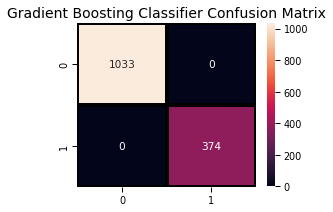

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
1.0


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



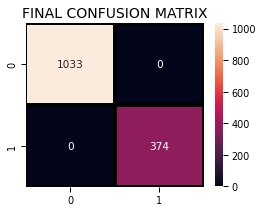

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

##Lets try some advance model

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb_clf = LGBMClassifier(random_state=17)

In [ ]:
%%time
lgb_clf.fit(X_train, y_train)

CPU times: user 631 ms, sys: 16.1 ms, total: 647 ms
Wall time: 669 ms


LGBMClassifier(random_state=17)

In [ ]:
accuracy_score(y_test, lgb_clf.predict(X_test))

1.0

Lets do hyperparameter tunning

stage 1 of hyperparameter tunning

In [ ]:
param_grid = {'num_leaves': [7, 15, 31, 63], 
              'max_depth': [3, 4, 5, 6, -1]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, 
                             cv=5, verbose=1, n_jobs=4)

In [ ]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=17), n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, -1],
                         'num_leaves': [7, 15, 31, 63]},
             verbose=1)

In [ ]:
grid_searcher.best_params_, grid_searcher.best_score_

In [ ]:
accuracy_score(y_test, grid_searcher.predict(X_test))

1.0

stage 2 of hyperparameter tunning

learning rate tunning

In [ ]:
num_iterations = 200
lgb_clf2 = LGBMClassifier(random_state=17, max_depth=3, 
                          num_leaves=15, n_estimators=num_iterations,
                          n_jobs=1)

param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf2, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_test, grid_searcher2.predict(X_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'learning_rate': 0.0021544346900318843} 1.0
1.0


In [ ]:
final_lgb = LGBMClassifier(n_estimators=500, num_leaves=15,
                           learning_rate=0.02154, max_depth=3,
                         n_jobs=4)

In [ ]:
final_lgb.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.02154, max_depth=3, n_estimators=500, n_jobs=4,
               num_leaves=15)

In [ ]:
lgb_final_pred = final_lgb.predict(X_test)
accuracy_score(y_test,lgb_final_pred)

1.0

In [ ]:
print(accuracy_score(y_test, lgb_final_pred))
print(classification_report(y_test,lgb_final_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



Random forest second model practice

In [ ]:
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(X_train,y_train)
pred_rfc = RFC.predict(X_test)
RFC_accuracy = RFC.score(X_test,y_test)*100
print('RFC Accuracy: ',RFC_accuracy)

Feature Selection

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler